# 支持向量机（SVM)

支持向量机是一种监督学习方法，可用于分类、回归和异常值检查。

## 支持向量机的优点是：

- 在高维空间有效。
- 在样本数量大的情况下仍然有效。
- 在决策函数中使用训练点的子集（称为支持向量），因此它也具有内存效率。
- 多功能：可以为决策功能指定不同的内核功能。提供了通用内核，但也可以指定自定义内核。

## 支持向量机的缺点包括：

- 如果要素的数量远远大于样本数量，请避免在选择内核函数时过度拟合，并且正则化项是至关重要的。
- SVM不直接提供概率估计，这些是使用昂贵的五重交叉验证计算的（参见下面的分数和概率）。

## 间隔与支持向量

给定训练样本集$D = {(x_1,y_1),(x_2,y_2),...(x_m,y_m)}， 其中 y_i \in \{-1,+1\}$，分类学习最基本的想法就是基于训练集D在样本空间中找到一个划分超平面，将不同类别的样本分开。但能将训练样本分开的超平面可能由很多，如下图所示：

![存在多个划分超平面将两类训练样本分开](images/svm/存在多个划分超平面将两类训练样本分开.png)

我们应该努力去找哪个呢？

直观上看，应该去找位于两类训练样本“正中间”的 划分超平面，即中间那条“粗线”，因为该划分超平面对训练样本局部扰动的容忍性最好。换言之，这个划分超平面所产生的分类结果是最鲁棒的，对未见示例的泛化性能最强。

在样本空间中，划分超平面可通过如下线性方程来描述：

$w^Tx + b =0$  ——（式1）

其中$w = (w_1;w_2;...;w_d)$为法向量，决定了超平面的方向；b为位移项，决定了超平面与原点之间的距离。显然，划分超平面可被法向量w和位移b确定，下面我们将其标记为$(w,b)$。样本空间中任意点x到超平面$(w,b)$的距离可写为：

$r = \frac{|w^Tx + b|}{||w||}$  ——式（2）

注释：

上式即用向量法求平面外一点到平面距离（距离 = 向量P点乘法向量再除以法向量的模。）

分子部分是向量$w^Tx + b$的数量积：$|w^Tx + b| = |w_1x_1+w_2x_2+...+w_dx_d + b| $  

分母部分是法向量$w$的模： $||w|| = \sqrt{w_1^2+w_2^2+...+w_d^2}$

假设超平面$(w,b)$能将训练样本正确分类，即对于$(x_i,y_i) \in D$，若$y_i = +1$，则由$w^Tx_i + b > 0 $；若$y_i = -1$，则由$w^Tx_i + b < 0 $。令：

$$\left\{
\begin{aligned}
w^Tx_i + b \geq +1, y_i = +1;  \\
w^Tx_i + b \leq -1, y_i = -1。\\
\end{aligned}
\right.  ——式（3）
$$


如下图所示，**距离超平面最近的这几个训练样本点使式（3）的等号成立，它们被称为“支持向量"(support vector)**.

![支持向量与间隔](images/svm/支持向量与间隔.png)

两个异类支持向量到超平面的距离之和被称为**间隔（margin）**，计算式为：

$\gamma = \frac{2}{||w||}$  ——式（4）



想要找到具有“最大间隔”（maximun margin）的划分超平面，也就是要找到能满足式（3）中约束的参数$w$和$b$，使得$\gamma$最大，即：

$max_{w,b} \frac{2}{||w||}$  ——式（5）

s.t.(约束条件)： $ y_i(w^Tx_i + b) \geq 1, i = 1,2,...,m.$

显然，为了最大化间隔，仅需最大化$||w||^{-1}$，这等价于最小化$||w||^2$。于是，式（5）可重写为：

$min_{w,b} \frac{||w||^2}{2}$  ——式（6）

s.t. $ y_i(w^Tx_i + b) \geq 1, i = 1,2,...,m.$

**这就是支持向量机（Support Vector Machine，简称SVM）的基本型。**

## 核函数

之前的讨论，我们假设了训练样本是线性可分的，即存在一个划分超平面能将训练样本正确分类。

然而在现实任务中，原始样本空间内也许并不存在一个能正确划分两类样本的超平面。

例如下图中的抑或问题就不是线性可分的：

![异或问题与非线性映射](images/svm/异或问题与非线性映射.png)

对这样的问题，可将样本从原始空间映射到一个更高维的特征空间（扩维），使得样本在这个特征空间内线性可分。例如，在上图中，若将原始的二维空间映射到一个合适的三维空间，就能找到一个合适的划分超平面。

幸运的是，如果原始空间是有限维，即属性数有限，那么一定存在一个高维特征空间使样本可线性划分。

令$\phi(x)$ 表示将x映射后的特征向量，于是，在特征空间中划分超平面所对应的模型可表示为：

$f(x) = w^T\phi(x) + b$ ——式（19）

其中，w和b式模型参数。类似式（6），有：

$min_{w,b} \frac{||w||^2}{2}$  ——式（20）

s.t. $ y_i(w^T \phi(x_i) + b) \geq 1, i = 1,2,...,m.$

其对偶问题是：

$max_\alpha \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}\alpha_i \alpha_j y_i y_j \phi(x_i)^T \phi(x_j)$  ——式（21）

s.t. $ \sum_{i=1}^m \alpha_i y_i = 0,$

$\alpha_i \geq 0, i = 1,2,...,m.$

求解式（21）涉及到计算$\phi(x_i)^T\phi(x_j)$，这是样本$x_i$与$x_j$映射到特征空间之后的内积。由于特征空间维数可能很高，甚至可能是无穷维，因此直接计算$\phi(x_i)^T\phi(x_j)$通常是困难的。为了避开这个障碍，可以设想这样一个函数：

$K(x_i,x_j) = <\phi(x_i),\phi(x_j)> = \phi(x_i)^T \phi(x_j)$  ——式（22）

即$x_i,x_j$在特征空间的内积等于它们在原始样本空间中通过函数$K(.,.)$计算的结果。有了这样的函数，我们就不必直接去计算高位甚至无穷维特征空间中的内积，于是式（21）可重写为：

$max_\alpha \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}\alpha_i \alpha_j y_i y_j K(x_i,x_j)$  ——式（23）

s.t. $ \sum_{i=1}^m \alpha_i y_i = 0,$

$\alpha_i \geq 0, i = 1,2,...,m.$

求解后即可得到：

$f(x) = w^T\phi(x) + b = \sum_{i=1}^m \alpha_i y_i \phi(x_i)^T \phi(x) +b = \sum_{i=1}^m \alpha_i y_i K(x,x_i) +b$  ——式（24）

**这里的函数 $K(.,.)$ 就是“核函数”（kernel function）。式（24）显示出模型最优解可通过训练样本的核函数展开，这一展开式亦称为“支持向量展式”（support vector expansion）。**

显然，若已知合适映射$\phi(.)$的具体形式，则可写出核函数 $K(.,.)$ 。但在现实任务中我们通常不知道$\phi(.)$是什么形式，那么，合适的核函数是否一定存在呢? 什么样的函数能做核函数呢?

我们有下面的定理：

...


通过前面的讨论，我们希望样本在特征空间内线性可划分，因此特征空间的好坏对支持向量机的性能至关重要。需注意的是，在不知道特征映射的形式时，我们并不知道什么样的核函数是合适的，而核函数也仅是隐式地定义了这个特征空间。

于是，“核函数选择”称为支持向量机地最大变数。若核函数选择不合适，则意味着将样本映射到了一个不合适地特征空间，很可能导致性能不佳。

下表列出了几种常用地核函数：

![常用核函数](images/svm/常用核函数.png)

此外，还可通过函数组合得到，例如：

- 若$K_1$和$K_2$为核函数，则对于任意正数$\gamma_1$和$\gamma_2$，其线性组合：

$\gamma_1 K_1 + \gamma_2 K_2$ ——式（25）

也是核函数。

- 若$K_1$和$K_2$为核函数，则核函数地直积：

$K_1 \otimes K_2 (x,z) = K_1(x,z)K_2(x,z) $ ——式（26）

也是核函数。

- 若$K_1$为核函数，则对于任意函数g(x)：

$K(x,z) = g(x) K_1(x,z)g(z) $ ——式（27）

也是核函数。

## 使用sklearn中的svm模型进行预测

先看一个使用SVM进行分类的简单示例：

In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

df = pd.DataFrame({'x1':[-1,-2,1,2],
                   'x2':[-1,-1,1,1],
                   'y':[-1,-2,1,2]})

clf = SVC(gamma='auto')
clf.fit(df.iloc[:,:-1]   ,     df.iloc[:,-1] ) 
print("训练数据集：")
print(df)

print("待预测数据x1和x2为：{}".format([-0.8, -1]))
print("预测结果y：{}".format(clf.predict([[-0.8, -1]])))


训练数据集：
   x1  x2  y
0  -1  -1 -1
1  -2  -1 -2
2   1   1  1
3   2   1  2
待预测数据x1和x2为：[-0.8, -1]
预测结果y：[-1]


### 分类任务

在sklearn中，有3种适合多分类任务的算法：

- SVC：C支持向量分类器

这个算法基于libsvm，拟合时间复杂度多余样本数量的平方，因此它不适合于多余10000个样本数以上的数据集。

- NuSVC：Nu支持向量分类器

Nu支持向量分类器，近似于SVC，但是使用一个参数来控制支持向量的数量。这个分类器基于libsvm实现。

- LinearSVC：线性支持向量分类器

线性支持向量分类器，类似于SVC，但多了个参数“linear”。这个算法基于liblinear实现，在选择惩罚（penalties）和损失函数时，它还有更多的灵活性，此外它还适合更大的数据集。

下面举例说明SVM分类器的应用：



#### 准备数据

Iris数据集是机器学习任务中常用的分类实验数据集，由Fisher在1936收集整理。Iris中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set，是一类多重变量分析的数据集。Iris一共包含150个样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

![鸢尾花图](images/svm/鸢尾花图.jpg)

通俗地说，iris数据集是用来给莺尾花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征（下表中的前4列），我们需要建立一个分类器，该分类器可通过样本的四个特征来来判断样本属于山鸢尾（Setosa）、变色鸢尾（Versicolour）还是维吉尼亚鸢尾（Virginica）中的哪一个，即机器学习中的分类问题。

iris的每个样本都包含了品种信息，即目标属性（第5列，也叫target或label）。

![鸢尾花数据集样例](images/svm/鸢尾花数据集.png)

这个数据可以通过下列代码直接调用：

In [37]:
from sklearn import svm, datasets
import pandas as pd
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data
y = iris.target


df = pd.DataFrame(X,columns= ["花萼长度(sepal length)","花萼宽度(sepal width)","花瓣长度(petal length)","花瓣宽度(petal width)"])
df['鸢尾花类别'] = y
df.head()

,花萼长度(sepal length),花萼宽度(sepal width),花瓣长度(petal length),花瓣宽度(petal width),鸢尾花类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 分析数据

我们需要了解数据集中每个属性的值的分布情况，也需要了解各属性之间的关系。

首先，要想了解一下某个属性的值的分布情况，可以使用pandas中的describe函数。

In [38]:
df["花萼长度(sepal length)"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: 花萼长度(sepal length), dtype: float64

为了了解属性间的相对关系，下面我们使用matplotlib对数据集进行可视化分析

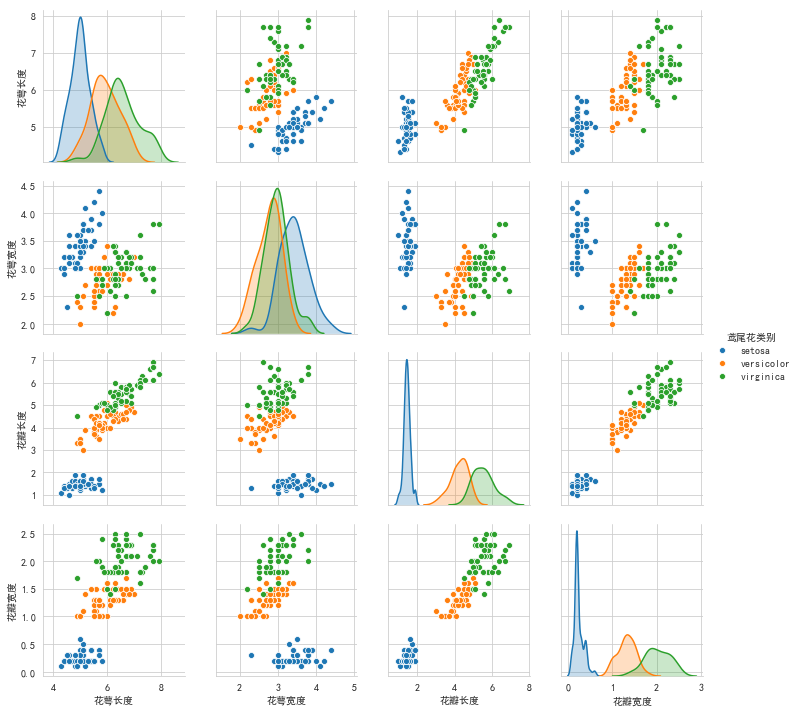

In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
# 设置显示中文
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

iris=load_iris()

df=pd.DataFrame(iris.data,columns=["花萼长度","花萼宽度","花瓣长度","花瓣宽度"])
df["鸢尾花类别"]=iris.target #增加一列，为鸢尾花的类别

df.loc[df["鸢尾花类别"]==0,"鸢尾花类别"]="setosa" #把类别这一列数值为0的替换为setosa
df.loc[df["鸢尾花类别"]==1,"鸢尾花类别"]="versicolor" #把类别这一列数值为1的替换为versicolor
df.loc[df["鸢尾花类别"]==2,"鸢尾花类别"]="virginica" #把类别这一列数值为2的替换为virginica

sns.pairplot(df,hue="鸢尾花类别") # 画Seaborn的散点图矩阵（Pairs Plots）.
"""散点图矩阵建立在两个基本图形上，直方图和散点图。
   对角线上的直方图允许我们看到单个变量的分布，而上下三角形上的散点图显示了两个变量之间的关系。
"""


plt.show()

#### 选用模型/算法

在这一讲，我们选用svm模型来进行分类。

sklearn中的svc模型，在使用前要设置参数，先介绍一下它的参数：

- C: float参数 默认值为1.0

错误项的惩罚系数。C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低，也就是对测试数据的分类准确率降低。相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。

- kernel: str参数 默认为‘rbf’。算法中采用的核函数类型，可选参数有：
  - linear:线性核函数
  - poly：多项式核函数
  - rbf：径像核函数/高斯核
  - sigmod:sigmod核函数

除了上面限定的核函数外，还可以给出自己定义的核函数，其实内部就是用你自己定义的核函数来计算核矩阵。

- precomputed:核矩阵

precomputed表示自己提前计算好核函数矩阵，这时候算法内部就不再用核函数去计算核矩阵，而是直接用你给的核矩阵。

- degree: int型参数 默认为3。这个参数只对多项式核函数有用，是指多项式核函数的阶数n。如果给的核函数参数是其他核函数，则会自动忽略该参数。

In [ ]:
from sklearn import svm
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)

clf.fit(X, y)

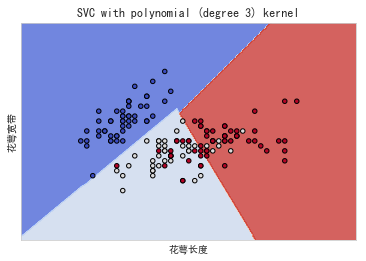

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in 生成网格点坐标矩阵。
    
    坐标矩阵：横坐标矩阵X（XX中的每个元素），与纵坐标矩阵Y（YY中对应位置元素），共同构成一个点的完整坐标。


    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(xx)
    #print(yy)
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
       画出决策边界（划分平面）
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 预测（求超平面，这个平面由点的矩阵构成），ravel()函数将xx或yy转化为一维矩阵
    Z = Z.reshape(xx.shape) # 将Z矩阵调整为xx矩阵的同型矩阵
    out = ax.contourf(xx, yy, Z, **params) #contour和contourf都是画三维等高线图的，不同点在于contourf会对等高线间的区域进行填充
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
model =  clf.fit(X, y)

# title for the plot
titles = 'SVC with linear kernel'


plt.figure()


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(plt, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('花萼长度')
plt.ylabel('花萼宽带')
plt.xticks(())
plt.yticks(())
plt.title(title)

plt.show()

#### 比较各种分类器

Automatically created module for IPython interactive environment


D:\pythonspace\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\pythonspace\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


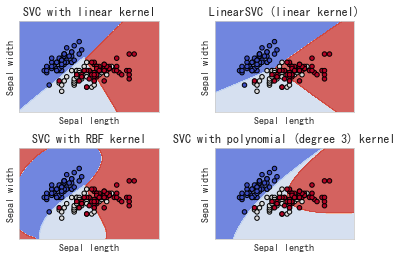

In [52]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in 生成网格点坐标矩阵。
    
    坐标矩阵：横坐标矩阵X（XX中的每个元素），与纵坐标矩阵Y（YY中对应位置元素），共同构成一个点的完整坐标。


    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(xx)
    #print(yy)
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
       画出决策边界（划分平面）
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 预测（求超平面，这个平面由点的矩阵构成），ravel()函数将xx或yy转化为一维矩阵
    Z = Z.reshape(xx.shape) # 将Z矩阵调整为xx矩阵的同型矩阵
    out = ax.contourf(xx, yy, Z, **params) #contour和contourf都是画三维等高线图的，不同点在于contourf会对等高线间的区域进行填充
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 回归任务

svm除了可以进行分类，还可以完成回归预测。

下面我们通过一个简单示例来讲解。

#### 准备数据

我们的数据是自定义的一组数值，我们可以把它想象成一个有一组x，和一组y。

我们不知道x与y之间的对应关系，但我们想在分析了x之后，预测新的$x^*$对应的$y^*$值

In [76]:
import numpy as np

# Generate sample data
x =  np.random.rand(20, 1)#创建一个40 *1的数组，将其填充在一个均匀分布的随机样本[0, 1)中,

x = np.sort(5 * x, axis=0) #numpy.sort()按值大小排序
y = np.sin(x).ravel()  # 我们可以假装不知道这个函数是sin函数。：）

print(X)
print(y)

[[0.34539723]
 [0.57011432]
 [0.60458355]
 [0.68315034]
 [0.76100007]
 [0.86073141]
 [0.88150675]
 [0.95922327]
 [0.96095099]
 [1.33944036]
 [1.41851514]
 [1.55961735]
 [1.66945562]
 [1.70395538]
 [1.87938577]
 [1.94869687]
 [1.94894866]
 [1.96202654]
 [2.16951445]
 [2.17143034]
 [2.23290733]
 [2.28803742]
 [2.40141444]
 [2.53683882]
 [2.53773517]
 [2.70510168]
 [2.82509688]
 [2.87628572]
 [2.98501751]
 [3.07972317]
 [3.20015124]
 [3.40614637]
 [3.47903405]
 [3.68043564]
 [3.82025831]
 [3.92736367]
 [4.05679361]
 [4.15103775]
 [4.20334812]
 [4.87260124]]
[ 0.05826023  0.20633688  0.92714496  0.98903896  0.99609269  0.94418909
  0.91555974  0.895887    0.88589633  0.83232446  0.47021108  0.40754805
  0.34072201  0.04172604 -0.21489371 -0.37104183 -0.38267964 -0.51698065
 -0.94872624 -0.99762107]


#### 分析数据

可以使用可视化方法来查看x与y的关系

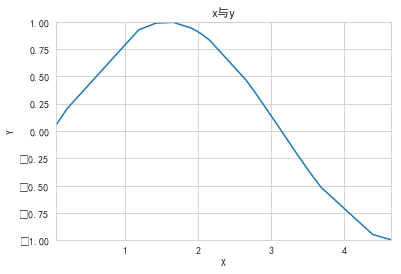

In [77]:
import pandas as pd

from matplotlib import pyplot as plt


df=pd.DataFrame(x,columns=["x"])
df["y"]=y #增加一列

plt.figure()


# 将训练集中点也画入散点图

plt.xlim(x.min(),x.max())
plt.ylim(y.min(),y.max())
plt.xlabel("X" )
plt.ylabel("Y") 
plt.title("x与y" )
plt.plot(x,y)

plt.show()

#### 选用模型/算法

我们使用svm算法的回归模型。在svm回归算法中，有三种可用于回归预测：

在sklearn中，有3种适合回归任务的算法：

- SVC：C支持向量回归

这个算法基于libsvm，拟合时间复杂度多余样本数量的平方，因此它不适合于多余10000个样本数以上的数据集。

- NuSVC：Nu支持向量回归

Nu支持向量回归，近似于SVC，但是使用一个参数来控制支持向量的数量。这个分类器基于libsvm实现。

- LinearSVC：线性支持向量回归

线性支持向量回归，类似于SVC，但多了个参数“linear”。这个算法基于liblinear实现，在选择惩罚（penalties）和损失函数时，它还有更多的灵活性，此外它还适合更大的数据集。

下面举例说明SVM回归的应用：


In [88]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model

svr = SVR(kernel='rbf', C=100, gamma='auto')
#svr = SVR(kernel='linear', C=100, gamma='auto')
#svr = SVR(kernel='poly', C=100, gamma='auto')

svr.fit(X, y)
newx = np.sort(5 * np.random.rand(1, 1), axis=0)
newy= svr.predict(newx)
print("若新x={},预测值为{}".format(newx,newy))
print("而真值sin({})={}".format(newx,np.sin(newx).ravel()))


若新x=[[4.65039481]],预测值为[-1.04646324]
sin([[4.65039481]])=[-0.99807898]


#### 比较各种回归器

Automatically created module for IPython interactive environment


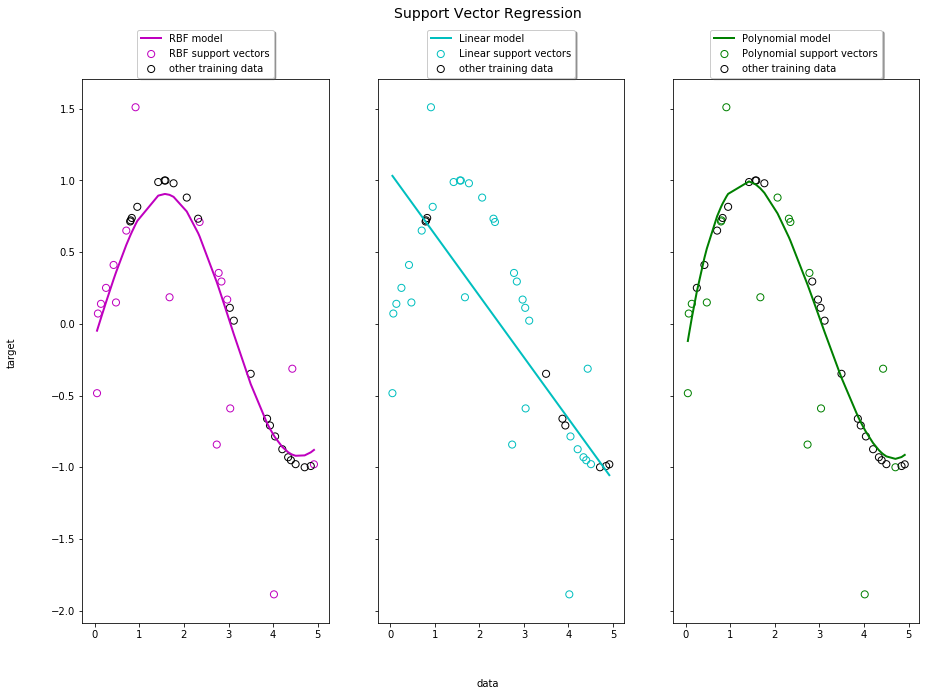

In [15]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()